In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import preprocessing
filename = ("Logisticdataset.csv")
df = pd.read_csv(filename,sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')
df=df.iloc[np.random.permutation(len(df))]
train=df.sample(frac=0.8) #random state is a seed value
test=df.drop(train.index)
train.head

<bound method NDFrame.head of         x1      x2    y
88  4.0891  7.5417  0.0
94  4.6711  5.8055  0.0
61  5.9615  6.4565  0.0
80  2.4190  6.8511  0.0
4   6.4423  3.3590  1.0
..     ...     ...  ...
5   5.8097  3.2406  1.0
76  0.9008  3.4379  0.0
30  4.4939  1.4057  1.0
96  4.6711  6.2592  0.0
0   4.5192  2.6487  1.0

[80 rows x 3 columns]>

In [3]:
x1 = train['x1'].values
x2 = train['x2'].values
Y= train['y'].values
x1_test = test['x1'].values
x2_test= test['x2'].values
Y_test= test['y'].values

In [4]:
m = len(x1)
n=len(x1_test)
x0 = np.ones(m)
x0_test=np.ones(n)
#we assume x0 to be 1 
X = np.array([x0, x1, x2]).T
X_test=np.array([x0_test, x1_test, x2_test]).T
#.T is used to obtain transpose 
# Initial Coefficients of B is assumed to be 0 
#our eqn will be in form of b0 + b1*x1 +b2*x2
B = np.zeros(3)
Y = np.array(Y)
alpha = 0.001
#alpha is learning rate

In [5]:
def sigmoid(z):
        return 1 / (1 + np.exp(-z))
def predict(B,X):
    Y=B.dot(X)
    if Y>= 0.5:
        return 1
    else:
        return 0



In [6]:
def grad_desc(X, Y, B, a, iteration):
    #is used to obtain a plot of how gradient descent works 
    m = len(Y)
    
    for i in range(iteration):
        # value obtained from hypothesis
        z = X.dot(B)
        # Difference between Hypothesis and Actual Y
        #note that los is calculate for all values so we divide it by m to obtain average loss
        h=sigmoid(z)
        loss =  Y- h
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B + a * gradient
        # New Cost Value
        
    return B

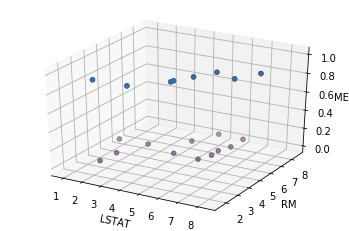

<Figure size 36000x28800 with 0 Axes>

In [7]:
newB= grad_desc(X, Y, B, alpha, 200000)
Ypred = [0] * n
for i in range (0,n):
    Ypred[i]=predict(newB,X_test[i])

from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(x1_test,x2_test,Y_test,color='r')
threedee.scatter(x1_test,x2_test,Ypred)
threedee.set_xlabel('LSTAT')
threedee.set_ylabel('RM')
threedee.set_zlabel('MEDV')
plt.figure(figsize=(500,400)) 
plt.show()

In [8]:

def rmse(Y_test, Y_pred):
    rmse = np.sqrt(sum((Y_test - Y_pred) ** 2) / len(Y))
    return rmse
print(rmse(Y_test,Ypred))
print(Y_test,Ypred)

0.0
[1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.] [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1]
